In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sheet_unfolding as su

In [2]:
# Define some Zeldovich initial conditions
L, ngrid, D = 100., 64, 0.55

qi = su.math.uniform_grid_nd((ngrid, ngrid), L=L)
pos0 = np.copy(qi)
pos0[...,0] += 6.*np.sin(2.*np.pi*(6.*qi[...,0] + 1.*qi[...,1])/L) * D
pos0[...,1] += 1.*np.sin(2.*np.pi*(6.*qi[...,0] + 1.*qi[...,1])/L) * D

pos0 = pos0.reshape(-1,2)

In [3]:
# Do the sheet unfolding
pos, mass, tri, idptr = su.unfold2d(np.float32(pos0).reshape(-1,2), L=L, mass=1.)

# Initial tesselation for some plots
tri0 = su.math.tesselation2d(ngrid)

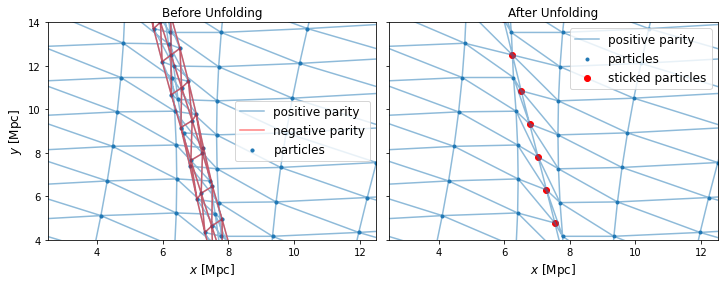

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0.04)

m0 = 1.

# a mask for not drawing triangles that are large due to box-wrapping
trisel = su.math.trimask(pos0, tri0, maxsize=L/2.) 

parity = su.math.triangle_parity(tri0, pos0.reshape(-1,2), L)
tricol = trisel & (parity < 0)

axs[0].scatter(pos0[:,0], pos0[:,1], marker=".", s=40, label="particles")
axs[0].triplot(pos0[...,0].reshape(-1), pos0[...,1].reshape(-1), tri0[trisel], alpha=0.5, label="positive parity")
axs[0].legend(fontsize=14)
axs[0].triplot(pos0[...,0].reshape(-1), pos0[...,1].reshape(-1), tri0[tricol], alpha=0.5, color="red", label="negative parity")


h, l = axs[0].get_legend_handles_labels()
axs[0].legend(handles=[h[0], h[2],h[4]],labels=[l[0], l[2], l[4]], fontsize=12)
axs[0].set_title("Before Unfolding")

selmassive = mass > m0

parity = su.math.triangle_parity(tri, pos[...,0:2].reshape(-1,2), L)

trisel = su.math.trimask(pos, tri, maxsize=30.)

axs[1].scatter(pos[mass > 0.,0], pos[mass > 0.,1], marker=".", label="particles")
axs[1].triplot(pos[...,0].reshape(-1), pos[...,1].reshape(-1), idptr[tri[trisel]], alpha=0.5, label="positive parity")
axs[1].scatter(pos[selmassive,0], pos[selmassive,1], marker="o", color="red", label="sticked particles")

h, l = axs[1].get_legend_handles_labels()
axs[1].legend(handles=[h[0], h[2],h[3]],labels=[l[0], l[2], l[3]], fontsize=12, loc="upper right")

axs[1].set_title("After Unfolding")

for ax in axs.flat:
    ax.set_xlim(2.5,12.5)
    ax.set_ylim(4,14)
    
    ax.set_xlabel(r"$x$ [Mpc]", fontsize=12)
    
axs[0].set_ylabel(r"$y$ [Mpc]", fontsize=12)
plt.savefig("plots/derefinement.pdf", bbox_inches="tight")